# EDA 1 | Parte 3.1 - Análise dos Textos dos Hinos da ICM
Este notebook explora o conteúdo textual dos hinos da coletânea principal da Igreja Cristã Maranata.

O objetivo é analisar o texto dos louvores, extraindo informações como número de palavras, tokens, frequências, n-grams e similaridade entre hinos.

---
**Conteúdo do notebook:**
- Carregamento dos dados tratados
- Tokenização e remoção de stopwords
- Análise do número de palavras por hino
- Visualização da distribuição de tokens por categoria
- Análise de palavras mais longas e frequentes
- Geração de nuvem de palavras

---

**A seguir:** Importação e preparação da lista de stopwords, combinando fontes externas e do NLTK para uso na tokenização.

In [1]:
import pandas as pd
from pathlib import Path

assets_folder = Path("../assets")
hinos_analise: pd.DataFrame = pd.read_pickle(assets_folder / "hinos_analise.pkl")
hinos_analise = hinos_analise.set_index("numero")
hinos_analise["categoria_abr"] = hinos_analise["categoria"].apply(
    lambda x: x[:13] + "..." if len(x) > 15 else x
)
hinos_analise.head()

,nome,texto,texto_limpo,categoria_id,categoria,categoria_abr
numero,,,,,,
0,AQUILO QUE FUI NÃO SOU MAIS,"AQUILO QUE FUI NÃO SOU MAIS,\nNEM SOU TUDO O Q...","AQUILO QUE FUI NÃO SOU MAIS, NEM SOU TUDO O QU...",1,CLAMOR,CLAMOR
1,O SANGUE DE JESUS TEM PODER,"O SANGUE DE JESUS TEM PODER,\nPODER QUE A MIM ...","O SANGUE DE JESUS TEM PODER, PODER QUE A MIM P...",1,CLAMOR,CLAMOR
2,O SANGUE DE JESUS TEM PODER PARA SALVAR,O SANGUE DE JESUS TEM PODER (2x)\nO SANGUE DE ...,"O SANGUE DE JESUS TEM PODER O SANGUE DE JESUS,...",1,CLAMOR,CLAMOR
3,CLAMO A TI,"CLAMO A TI, Ó MEU SENHOR,\nCLAMO A TI, MEU SAL...","CLAMO A TI, Ó MEU SENHOR, CLAMO A TI, MEU SALV...",1,CLAMOR,CLAMOR
4,QUANDO TE PROSTRARES,"QUANDO TE PROSTRARES DIANTE DE DEUS,\nLEMBRA Q...","QUANDO TE PROSTRARES DIANTE DE DEUS, LEMBRA QU...",1,CLAMOR,CLAMOR


---

## Tokenização

**A seguir:** Tokenização dos textos dos hinos, remoção de stopwords e pontuação, e cálculo do número total de palavras por hino.

In [2]:
import nltk

nltk.download("stopwords")
stopwords_nltk = nltk.corpus.stopwords.words("portuguese")

with open(assets_folder / "stopwords-br.txt", "r", encoding="utf-8") as f:
    stopwords = f.read().splitlines()

# remover linhas que comecao com #
stopwords = [eval(word) for word in stopwords if not word.startswith("#")]
stopwords.extend(["ó", "ti", "pra", "lo", "oh", "és"])

# merge
stopwords = list(set(stopwords + stopwords_nltk))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


---

**A seguir:** Exibição dos 10 hinos com maior e menor quantidade de palavras, destacando extremos do corpus.

In [3]:
from tqdm import tqdm


all_tokens = []
all_tokens_no_stops = []

for hino in tqdm(hinos_analise.to_dict("records")):
    tokens = nltk.tokenize.regexp_tokenize(hino["texto_limpo"], r"\w+")
    # Replace "MINH" com "MINHA" usando regex
    tokens = [nltk.re.sub(r"^minh$", "minha", palavra.lower()) for palavra in tokens]
    tokens_no_stops = [
        palavra for palavra in tokens if palavra.lower() not in stopwords
    ]
    # remover pontuacao
    tokens = [palavra for palavra in tokens if palavra.isalpha()]
    tokens_no_stops = [palavra for palavra in tokens_no_stops if palavra.isalpha()]

    all_tokens.append(tokens)
    all_tokens_no_stops.append(tokens_no_stops)

hinos_analise["tokens"] = all_tokens
hinos_analise["tokens_no_stops"] = all_tokens_no_stops
# considerando numero total de palavras, pois todas elas tem que ser cantadas, logo impactam no tamanho prático do hino
hinos_analise["num_tokens"] = hinos_analise["tokens"].apply(len)
hinos_analise.head()

100%|██████████| 795/795 [00:01<00:00, 686.41it/s]


,nome,texto,texto_limpo,categoria_id,categoria,categoria_abr,tokens,tokens_no_stops,num_tokens
numero,,,,,,,,,
0,AQUILO QUE FUI NÃO SOU MAIS,"AQUILO QUE FUI NÃO SOU MAIS,\nNEM SOU TUDO O Q...","AQUILO QUE FUI NÃO SOU MAIS, NEM SOU TUDO O QU...",1,CLAMOR,CLAMOR,"[aquilo, que, fui, não, sou, mais, nem, sou, t...","[tudo, devo, graça, vê, certo, vou, glória, cr...",124
1,O SANGUE DE JESUS TEM PODER,"O SANGUE DE JESUS TEM PODER,\nPODER QUE A MIM ...","O SANGUE DE JESUS TEM PODER, PODER QUE A MIM P...",1,CLAMOR,CLAMOR,"[o, sangue, de, jesus, tem, poder, poder, que,...","[sangue, jesus, pode, valer, comunhão, posso, ...",110
2,O SANGUE DE JESUS TEM PODER PARA SALVAR,O SANGUE DE JESUS TEM PODER (2x)\nO SANGUE DE ...,"O SANGUE DE JESUS TEM PODER O SANGUE DE JESUS,...",1,CLAMOR,CLAMOR,"[o, sangue, de, jesus, tem, poder, o, sangue, ...","[sangue, jesus, sangue, jesus, sangue, jesus, ...",50
3,CLAMO A TI,"CLAMO A TI, Ó MEU SENHOR,\nCLAMO A TI, MEU SAL...","CLAMO A TI, Ó MEU SENHOR, CLAMO A TI, MEU SALV...",1,CLAMOR,CLAMOR,"[clamo, a, ti, ó, meu, senhor, clamo, a, ti, m...","[clamo, senhor, clamo, salvador, sangue, vida,...",41
4,QUANDO TE PROSTRARES,"QUANDO TE PROSTRARES DIANTE DE DEUS,\nLEMBRA Q...","QUANDO TE PROSTRARES DIANTE DE DEUS, LEMBRA QU...",1,CLAMOR,CLAMOR,"[quando, te, prostrares, diante, de, deus, lem...","[prostrares, diante, deus, lembra, jesus, pede...",52


In [4]:
display(hinos_analise.sort_values("num_tokens", ascending=False).head(10))
display(hinos_analise.sort_values("num_tokens", ascending=True).head(10))

,nome,texto,texto_limpo,categoria_id,categoria,categoria_abr,tokens,tokens_no_stops,num_tokens
numero,,,,,,,,,
459,"É TEMPO, É TEMPO","É TEMPO, É TEMPO, \nO MESTRE ESTÁ CHAMANDO JÁ!...","É TEMPO, É TEMPO, O MESTRE ESTÁ CHAMANDO JÁ! M...",6,SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,SANTIFICAÇÃO ...,"[é, tempo, é, tempo, o, mestre, está, chamando...","[tempo, tempo, mestre, chamando, marchar, marc...",345
493,"COMO FOI PARA O CÉU, JESUS CRISTO HÁ DE VIR","COMO FOI PARA O CÉU, JESUS CRISTO HÁ DE VIR,\n...","COMO FOI PARA O CÉU, JESUS CRISTO HÁ DE VIR, Q...",7,VOLTA DE JESUS E ETERNIDADE,VOLTA DE JESU...,"[como, foi, para, o, céu, jesus, cristo, há, d...","[céu, jesus, cristo, som, trombeta, ecoar, voz...",273
310,MESTRE O MAR SE REVOLTA,"MESTRE, O MAR SE REVOLTA,\nAS ONDAS NOS DÃO PA...","MESTRE, O MAR SE REVOLTA, AS ONDAS NOS DÃO PAV...",5,CONSOLO E ENCORAJAMENTO,CONSOLO E ENC...,"[mestre, o, mar, se, revolta, as, ondas, nos, ...","[mestre, mar, revolta, ondas, dão, pavor, céu,...",262
731,SEQUÊNCIA DE LOUVORES Nº 1,"A\nDESDE O DIA EM QUE ACEITEI JESUS,\nA MINHA ...","A DESDE O DIA EM QUE ACEITEI JESUS, A MINHA VI...",11,CORINHOS,CORINHOS,"[a, desde, o, dia, em, que, aceitei, jesus, a,...","[dia, aceitei, jesus, vida, transformou, agora...",261
278,A NOVA DO EVANGELHO,A NOVA DO EVANGELHO\nJÁ SE FEZ OUVIR AQUI;\nBO...,A NOVA DO EVANGELHO JÁ SE FEZ OUVIR AQUI; BOAS...,4,"MORTE, RESSURREIÇÃO E SALVAÇÃO","MORTE, RESSUR...","[a, nova, do, evangelho, já, se, fez, ouvir, a...","[nova, evangelho, fez, ouvir, boas, novas, tão...",251
409,EIS MARCHAMOS PARA AQUELE BOM PAÍS,"EIS MARCHAMOS PARA AQUELE BOM PAÍS, \nONDE O C...","EIS MARCHAMOS PARA AQUELE BOM PAÍS, ONDE O CRE...",6,SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,SANTIFICAÇÃO ...,"[eis, marchamos, para, aquele, bom, país, onde...","[eis, marchamos, bom, país, crente, sim, crist...",248
467,OS GUERREIROS SE PREPARAM,"OS GUERREIROS SE PREPARAM\nPARA A GRANDE LUTA,...","OS GUERREIROS SE PREPARAM PARA A GRANDE LUTA, ...",6,SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,SANTIFICAÇÃO ...,"[os, guerreiros, se, preparam, para, a, grande...","[guerreiros, preparam, grande, luta, jesus, ca...",244
148,"UMA CERTA VEZ, JESUS CRISTO","UMA CERTA VEZ, JESUS CRISTO, \nPARA UMA GRANDE...","UMA CERTA VEZ, JESUS CRISTO, PARA UMA GRANDE M...",3,DEDICAÇÃO,DEDICAÇÃO,"[uma, certa, vez, jesus, cristo, para, uma, gr...","[certa, vez, jesus, cristo, grande, multidão, ...",239
364,DÁ-ME MAIS FÉ,DÁ-ME MAIS FÉ PRA QUE O MEU CHORO\nSOMENTE EST...,DÁ-ME MAIS FÉ PRA QUE O MEU CHORO SOMENTE ESTA...,5,CONSOLO E ENCORAJAMENTO,CONSOLO E ENC...,"[dá, me, mais, fé, pra, que, o, meu, choro, so...","[dá, fé, choro, somente, noite, possa, durar, ...",235


,nome,texto,texto_limpo,categoria_id,categoria,categoria_abr,tokens,tokens_no_stops,num_tokens
numero,,,,,,,,,
15,"CLAMAREI, CLAMAREI","CLAMAREI, CLAMAREI\nPELO SANGUE DE JESUS;\nELE...","CLAMAREI, CLAMAREI PELO SANGUE DE JESUS; ELE É...",1,CLAMOR,CLAMOR,"[clamarei, clamarei, pelo, sangue, de, jesus, ...","[clamarei, clamarei, sangue, jesus, paz, segur...",15
13,PÕE TEU SANGUE SOBRE MIM,"PÕE TEU SANGUE SOBRE MIM, (BIS)\nPORÇÃO DOBRAD...","PÕE TEU SANGUE SOBRE MIM, PORÇÃO DOBRADA, Ó SE...",1,CLAMOR,CLAMOR,"[põe, teu, sangue, sobre, mim, porção, dobrada...","[põe, sangue, porção, dobrada, senhor, dá, põe...",16
19,TEU POVO CLAMA,"TEU POVO CLAMA EM ORAÇÃO \nPELO TEU SANGUE, LI...","TEU POVO CLAMA EM ORAÇÃO PELO TEU SANGUE, LIBE...",1,CLAMOR,CLAMOR,"[teu, povo, clama, em, oração, pelo, teu, sang...","[povo, clama, oração, sangue, libertação, peca...",17
192,"JESUS, JESUS, EU TE AMO","JESUS, JESUS, EU TE AMO,\nÓ MEU SALVADOR;\nEU ...","JESUS, JESUS, EU TE AMO, Ó MEU SALVADOR; EU TE...",3,DEDICAÇÃO,DEDICAÇÃO,"[jesus, jesus, eu, te, amo, ó, meu, salvador, ...","[jesus, jesus, amo, salvador, quero, espero, s...",18
738,"GLÓRIA, GLÓRIA","GLÓRIA, GLÓRIA, GLÓRIA \nAO SENHOR JESUS.\nDEL...","GLÓRIA, GLÓRIA, GLÓRIA AO SENHOR JESUS. DELE É...",11,CORINHOS,CORINHOS,"[glória, glória, glória, ao, senhor, jesus, de...","[glória, glória, glória, senhor, jesus, glória...",18
11,"REVESTE, SENHOR, TEU POVO","REVESTE, SENHOR, TEU POVO \n(SIM, REVESTE)\n\n...","REVESTE, SENHOR, TEU POVO (SIM, REVESTE) COM O...",1,CLAMOR,CLAMOR,"[reveste, senhor, teu, povo, sim, reveste, com...","[reveste, senhor, povo, sim, reveste, sangue, ...",19
743,VENCEDOR SEREI,"VENCEDOR SEREI, (BIS)\nNADA ME ESPANTA, \nA CA...","VENCEDOR SEREI, NADA ME ESPANTA, A CAUSA É SAN...",11,CORINHOS,CORINHOS,"[vencedor, serei, nada, me, espanta, a, causa,...","[vencedor, nada, espanta, causa, santa, venced...",21
77,"VEM, VISITA TUA IGREJA","VEM, VISITA TUA IGREJA,\nÓ BENDITO SALVADOR!\t...","VEM, VISITA TUA IGREJA, Ó BENDITO SALVADOR! SE...",2,INVOCAÇÃO E COMUNHÃO,INVOCAÇÃO E C...,"[vem, visita, tua, igreja, ó, bendito, salvado...","[vem, visita, igreja, bendito, salvador, graça...",22
745,É DEUS QUEM NOS TEM DADO A VITÓRIA,É DEUS QUEM NOS TEM DADO A VITÓRIA (4X)\nALELU...,"É DEUS QUEM NOS TEM DADO A VITÓRIA ALELUIA, AL...",11,CORINHOS,CORINHOS,"[é, deus, quem, nos, tem, dado, a, vitória, al...","[deus, dado, vitória, aleluia, aleluia, alelui...",22


---

**A seguir:** Visualização da distribuição do número de palavras por categoria, utilizando boxplot para identificar padrões e variações.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4496\3557578003.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hinos_analise, x="categoria_id", y="num_tokens", palette="viridis")


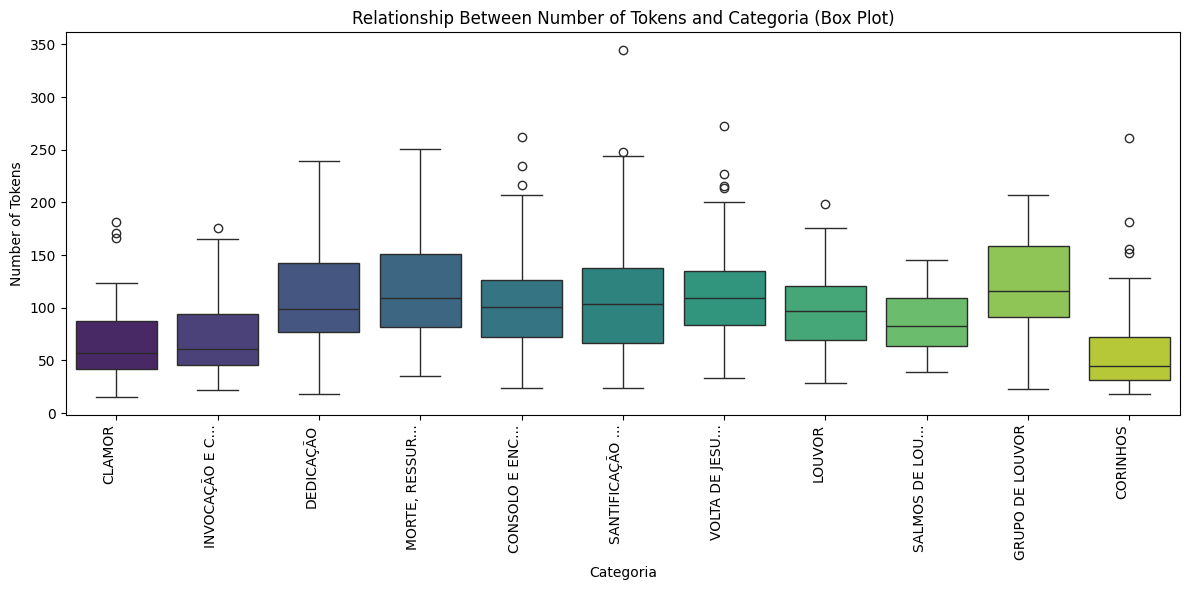

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Garantir que 'categoria_id' é tratado como uma variável categórica
hinos_analise["categoria_id"] = hinos_analise["categoria_id"].astype("category")

# Criar um mapeamento entre categoria_id e categoria
categoria_mapping = (
    hinos_analise[["categoria_id", "categoria_abr"]]
    .drop_duplicates()
    .set_index("categoria_id")["categoria_abr"]
)

# Criar um Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=hinos_analise, x="categoria_id", y="num_tokens", palette="viridis")

# Trocar x-ticks com os nomes correspondentes da 'categoria'
plt.xticks(
    ticks=range(len(categoria_mapping)),
    labels=categoria_mapping,
    rotation=90,
    ha="right",
)

# Adiciona labels e titulo
plt.xlabel("Categoria")
plt.ylabel("Número de Tokens")
plt.title("Relação Entre Número de Tokens e Categoria (Box Plot)")

plt.tight_layout()
plt.show()

---

**A seguir:** Análise de palavras: extração, identificação das mais longas, contagem de frequência e visualização das palavras mais comuns com nuvem de palavras e gráfico de barras.

## Histograma de frequência de tamanho das palavras

**A seguir:** Geração de um histograma mostrando a frequência dos tamanhos das palavras nos textos dos hinos, para entender a distribuição do comprimento das palavras utilizadas.

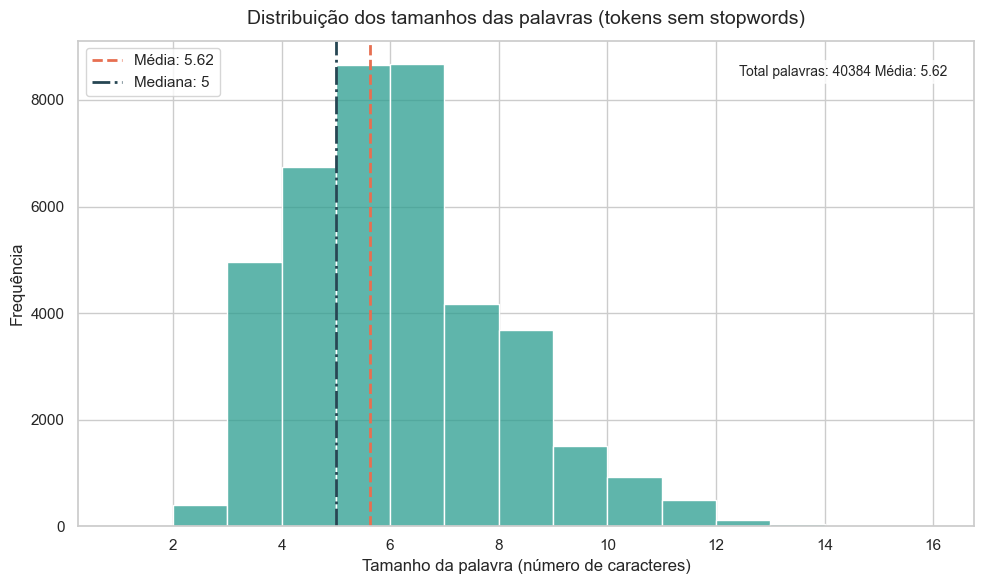

In [ ]:
# Histograma mais apresentável: distribuição do tamanho das palavras (tokens sem stopwords)
import numpy as np
import seaborn as sns

# Extrair tamanhos das palavras (tratando casos vazios)
palavras_explodidas = hinos_analise["tokens_no_stops"].explode().dropna().tolist()
line_num_words = [
    len(p) for p in palavras_explodidas if isinstance(p, str) and p.strip() != ""
]

# Configurar estilo
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Histogram + KDE
ax = sns.histplot(
    line_num_words, bins=range(1, max(line_num_words) + 2), color="#2a9d8f"
)

# Estatísticas
media = np.mean(line_num_words)
mediana = np.median(line_num_words)

# Linhas de média e mediana
ax.axvline(
    media, color="#e76f51", linestyle="--", linewidth=2, label=f"Média: {media:.2f}"
)
ax.axvline(
    mediana,
    color="#264653",
    linestyle="-.",
    linewidth=2,
    label=f"Mediana: {mediana:.0f}",
)

# Labels e título em português
ax.set_xlabel("Tamanho da palavra (número de caracteres)", fontsize=12)
ax.set_ylabel("Frequência", fontsize=12)
ax.set_title(
    "Distribuição dos tamanhos das palavras (tokens sem stopwords)", fontsize=14, pad=12
)

# Anotações: número total de palavras e modo
total = len(line_num_words)
props = dict(boxstyle="round", facecolor="white", alpha=0.8)
ax.text(
    0.97,
    0.95,
    f"Total palavras: {total} Média: {media:.2f}",
    transform=ax.transAxes,
    fontsize=10,
    verticalalignment="top",
    horizontalalignment="right",
    bbox=props,
)
ax.legend(loc="upper left")

plt.tight_layout()
plt.show()

## Palavras mais longas

**A seguir:** Exibição das 10 palavras mais longas encontradas nos textos dos hinos, destacando a diversidade lexical do corpus.

In [7]:
palavras = hinos_analise["tokens_no_stops"].explode().tolist()

# find the 10 largest words
palavras_unique = list(set(palavras))
palavras_unique.sort(key=len, reverse=True)
print("Quantidade de palavras únicas (sem repetição):", len(palavras_unique))
pd.DataFrame(
    {
        "palavra": palavras_unique[:10],
        "tamanho": [len(palavra) for palavra in palavras_unique[:10]],
    }
)

Quantidade de palavras únicas (sem repetição): 4549


,palavra,tamanho
0,espiritualmente,15
1,sobrecarregados,15
2,circunstâncias,14
3,sobrecarregado,14
4,carinhosamente,14
5,reverentemente,14
6,proporcionando,14
7,resplandecente,14
8,completamente,13
9,prosperamente,13


## Bag-of-words

**A seguir:** Criação de uma representação bag-of-words dos textos dos hinos, incluindo a frequência de cada palavra e um mapeamento das palavras para seus índices.

In [8]:
print("Total de palavras:", len(palavras))
set_words_full = list(set(palavras))
count_words = [palavras.count(i) for i in set_words_full]

contagem_palav = pd.DataFrame(
    zip(set_words_full, count_words), columns=["palavra", "contagem"]
)
contagem_palav = contagem_palav.sort_values("contagem", ascending=False)
contagem_palav["percentual"] = contagem_palav["contagem"] / len(palavras) * 100
contagem_palav.head(20)

Total de palavras: 40384


,palavra,contagem,percentual
3962,jesus,1542,3.818344
3140,senhor,1362,3.372623
3493,deus,953,2.359845
2880,amor,715,1.770503
4065,glória,567,1.404021
108,vem,550,1.361926
1151,cristo,465,1.151446
3875,vida,428,1.059826
2883,sempre,339,0.839441
2905,céu,325,0.804774


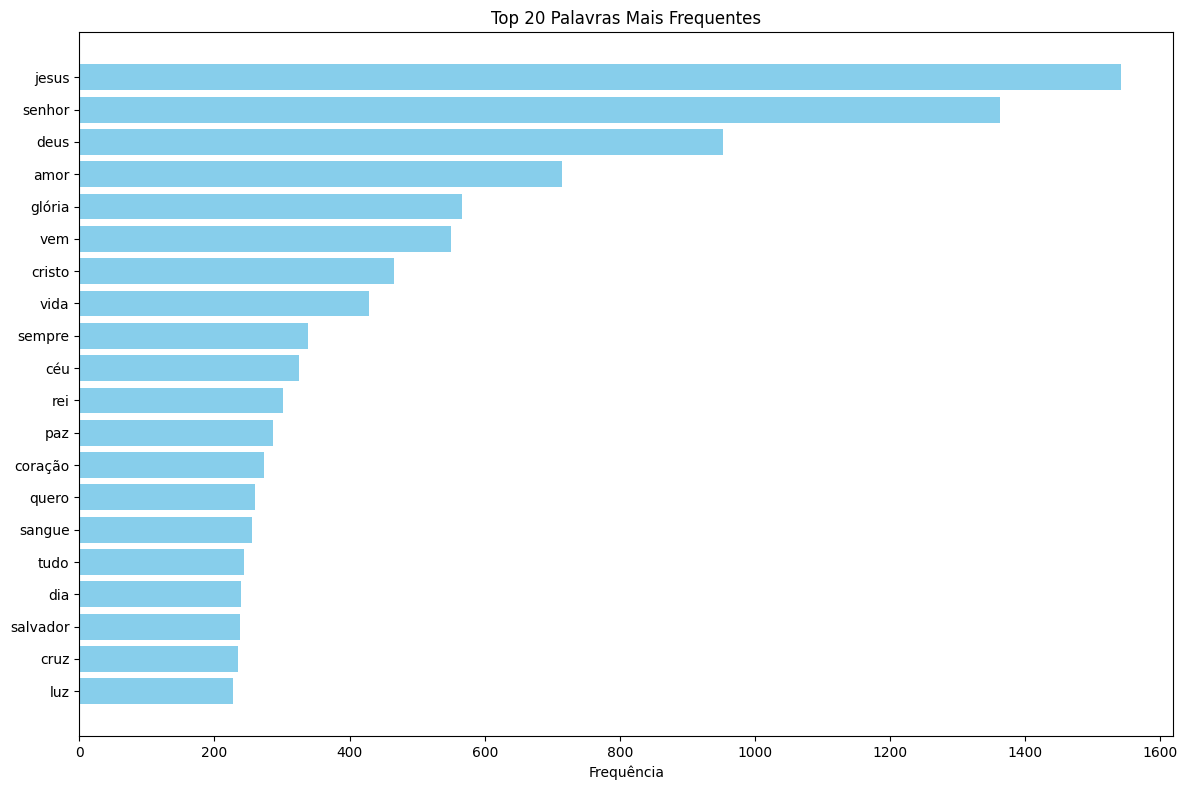

In [9]:
import matplotlib.pyplot as plt

# Also show top 20 most frequent words as a bar chart
plt.figure(figsize=(12, 8))
top_20 = contagem_palav.head(20)
plt.barh(range(len(top_20)), top_20["contagem"], color="skyblue")
plt.yticks(range(len(top_20)), top_20["palavra"])
plt.xlabel("Frequência")
plt.title("Top 20 Palavras Mais Frequentes")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Word cloud

**A seguir:** Geração de uma nuvem de palavras para visualizar as palavras mais frequentes nos textos dos hinos, destacando termos recorrentes e temas predominantes.

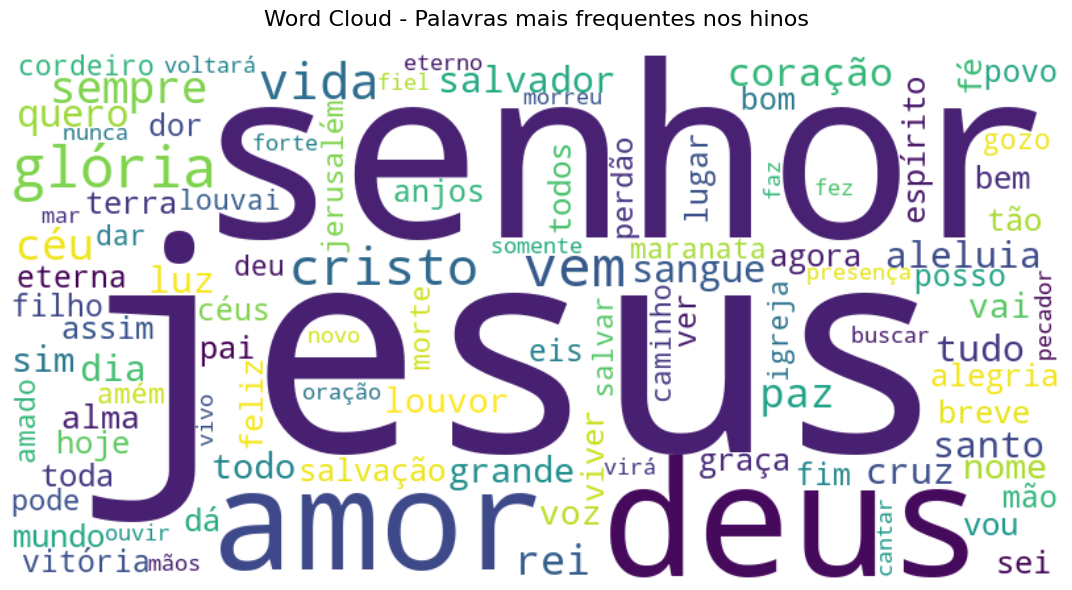

In [10]:
from wordcloud import WordCloud

# Create a dictionary from the word frequency data
word_freq_dict = dict(zip(contagem_palav["palavra"], contagem_palav["contagem"]))

# Generate word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=100,
    colormap="viridis",
    relative_scaling=0.5,
    random_state=42,
).generate_from_frequencies(word_freq_dict)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Palavras mais frequentes nos hinos", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

---

**A seguir:** Exportação dos dados tratados e enriquecidos para arquivo pickle, permitindo reutilização em outras análises ou notebooks.

In [11]:
hinos_analise.to_pickle(assets_folder / "hinos_analise_tokens.pkl")